## INFERENTIAL STATISTICS:
## REGRESSION ANALYSIS

**To create the Regression Model here is the following steps**

1. Define the Problem:
- Figure out what you want to predict or explain (the outcome/dependent variable).
- Identify the factors that might influence this outcome.

2. Gather Data:
- Collect information related to your problem.
- Make sure the data is clean and accurate.

3. Explore the Data:
- Look for patterns and relationships between the factors and the outcome.
- Use charts and graphs to visualize the data and stats.

4. Choose a Model:
- Select a type of model that best fits your problem (e.g., linear, logistic).

5. Train the Model:
- Teach the model to recognize patterns in the data.
- Use part of your data to train the model (70-80%)

6. Test the Model:
- Use a different part of your data (20-30%) to see how well the model works.
- Check if it can accurately predict outcomes.

7. Make Predictions:
- Use the trained model to predict new outcomes based on new data.

8. Interpret Results:
- Understand what the model learned from the data.
- Explain how the factors influence the outcome.

# 1. Simple Linear Regression
- The dependent/target variable is continuous
- Relationship between the indepedent/predictor variable and dependent/target variable is linear
- Applies to only two variables (one dependent, one independent)
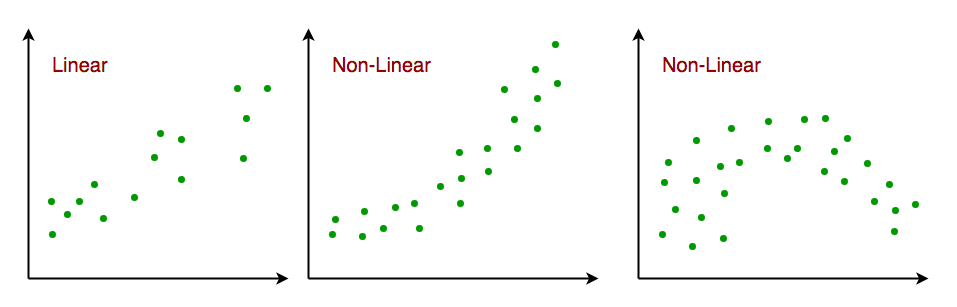

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

#Import dataset
data=pd.read_excel("Bike_Sales.xlsx")

#View dataframe
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,January,2017,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",2,1519,2443,1848,3038,4886
1,2017-01-01,1,January,2017,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2,1252,2295,2086,2504,4590
2,2017-01-01,1,January,2017,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,2814,4342,7156
3,2017-01-01,1,January,2017,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",2,713,1120,814,1426,2240
4,2017-01-01,1,January,2017,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",2,344,540,392,688,1080


**A. Check relationship between independent (Profit) and dependent variable (Revenue)**

<Axes: >

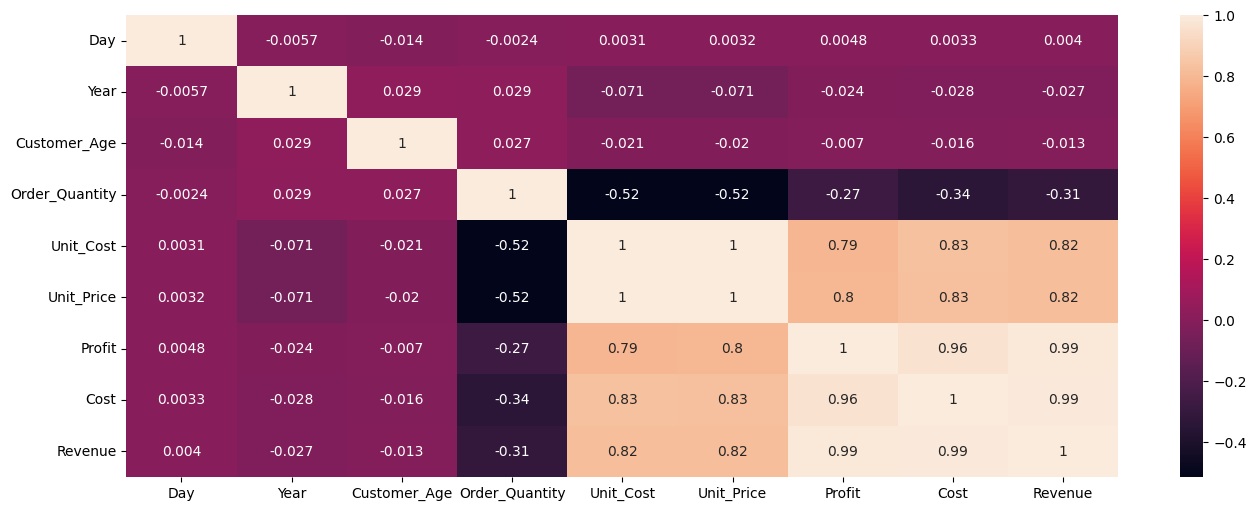

In [3]:
#Correlation between continuous variables and target Revenue
Variables=['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']
#Plot the heatmap
plt.figure(figsize=(16,6))
sns.heatmap(data[Variables].corr(), annot=True)

Revenue has a strong linear relationship with Unit_Cost, Unit_PRice, Profit and  Cost

In [7]:
#Select the x=indepedent, and y=dependent variables
x=data['Profit']
y=data['Revenue']
#Transform the x and y variables as numpy arrays
x, y = np.array(x), np.array(y)

#View variables
x

array([1848, 2086, 2814, ...,  407, 1043,  407])

In [8]:
#For statsmodel to calculate the intercept (The value of y when x is 0), you need to add a column of 1's to the independent variable (x or Profit)
x = sm.add_constant(x)
#view result
x

array([[1.000e+00, 1.848e+03],
       [1.000e+00, 2.086e+03],
       [1.000e+00, 2.814e+03],
       ...,
       [1.000e+00, 4.070e+02],
       [1.000e+00, 1.043e+03],
       [1.000e+00, 4.070e+02]])

**B. Generate linear model using ordinary least squares (OLS)**

In [29]:
# Generate a linear model based on ordinary least squares (OLS) 
#This is an instance of the class statsmodels.regression.linear_model.OLS
model = sm.OLS(y, x)#Notice that the first argument is the dependent variable, followed by the input (independent variable)
#Fit the model and get results
results = model.fit()

#View the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 4.002e+06
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:04:34   Log-Likelihood:            -7.8131e+05
No. Observations:              113036   AIC:                         1.563e+06
Df Residuals:                  113034   BIC:                         1.563e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -63.5401      0.853    -74.505      0.0

Intereprete results at https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html

**C. Use the model to make predictions/inferences**
- You can obtain the predicted response(Revenue) on the input values(x) used for creating the model using .fittedvalues or .predict() with the input array as the argument:

In [12]:
print(f"predicted response:\n{results.fittedvalues}")

predicted response:
[4426.72517339 5005.01690945 6773.90927857 ...  925.38739331 2470.73841908
  925.38739331]


In [13]:
#OR specify the input variable x(Profit) for which you want to use to make a prediction for y (Revenue)
print(f"predicted response:\n{results.predict(x)}")

predicted response:
[4426.72517339 5005.01690945 6773.90927857 ...  925.38739331 2470.73841908
  925.38739331]


- Using the model to make a prediction of Revenue for a different set of Profit values
- E.g. profit_new or x_new = ( $4,342.00 
 $1,426.00 
 $688.00 
 $1,426.00 
 $1,426.00 
 $1,426.00 
 $3,110.00 
 $2,504.00 
 $2,532.00 
 $2,532.00 
 $4,342.00 
 $688.00 
 $688.00 
 $688.00 )


In [15]:
#Gerating an array of the new Profits
x_new=[4,342.00, 1,426.00, 688.00, 1,426.00, 1,426.00, 3,110.00, 2,504.00, 2,532.00, 2,532.00, 4,342.00, 688.00, 688.00, 688.00]
#Transform the x and y variables as numpy arrays
x_new, y = np.array(x_new), np.array(y)
#√iew the x_new
x_new


array([  4., 342.,   1., 426., 688.,   1., 426.,   1., 426.,   3., 110.,
         2., 504.,   2., 532.,   2., 532.,   4., 342., 688., 688., 688.])

In [16]:
#Add column of 1's to calculate intercept
x_new = sm.add_constant(x_new)

In [17]:
#Use the model to make a prediction of Revenue
y_new = results.predict(x_new)
#View prediction
y_new

array([ -53.82088246,  767.45057464,  -61.11027409,  971.5535403 ,
       1608.16040941,  -61.11027409,  971.5535403 ,  -61.11027409,
        971.5535403 ,  -56.25067967,  203.73762184,  -58.68047688,
       1161.07772271,  -58.68047688, 1229.1120446 ,  -58.68047688,
       1229.1120446 ,  -53.82088246,  767.45057464, 1608.16040941,
       1608.16040941, 1608.16040941])

**D. Generate a Linear Regression Model using Supervised Machine Learning**

**i. Import Libraries for different ML Regressor algorithms**

In [18]:
#Testing various ML Regression Models for Revenue
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

**ii. Split data in to training and testing data**
- TRaining data: Used to train/supervise the learning of the ML algorithm (70-80% of dataset)
- Testing data: Used to test the algorithm for it's accuracy in learning patterns (20-30% of dataset)

In [19]:
#Use the train_test_split from sklearn library
from sklearn.model_selection import train_test_split
#Split the data (x=independent variable, y=Dependent variable)
# Split the data into training and test sets (By 70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
#Libraries for ML regressor algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#List the regressor algorithms or just chose to use one
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
}

**iii. Test the Algorithms**

In [21]:
# Function to evaluate and print model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

#USe the function to evaulate each algorithm
# Evaluate each model
results = {}
for name, model in models.items():
    mae, mse, rmse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}

# Print results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  R²: {metrics['R²']:.2f}\n")

Linear Regression:
  MAE: 162.09
  MSE: 58550.63
  RMSE: 241.97
  R²: 0.97

Decision Tree Regressor:
  MAE: 29.85
  MSE: 8069.56
  RMSE: 89.83
  R²: 1.00

Random Forest Regressor:
  MAE: 30.42
  MSE: 19866.43
  RMSE: 140.95
  R²: 0.99



The Decision Tree Regressor is the most accurate (R2=100%,) and has the lowest mean squared error (mse = 8096, rmse = 89.3).

**iv. Save the most accurate model**

In [22]:
# Saving the Decision Tree Regressor model as a joblib
#One can also save it as a pickle
#Pickles and Joblib saved models allow for automation of the model in Machine Learning
import joblib
joblib.dump(DecisionTreeRegressor(), 'Revenue_predictor.joblib')
print("Model saved as Decision Tree Regressor Model called 'Revenue_predictor.joblib'.")

Model saved as Decision Tree Regressor Model called 'Revenue_predictor.joblib'.


**v. Use the saved model to make predictions**

In [26]:
#Import model and used it
import joblib
# Load the saved model
model1 = joblib.load('Revenue_predictor.joblib')
model1.fit(X_train, y_train)
# Make predictions using the test dataset (x_new)
predictions = model1.predict(x_new)

# Print or use the predictions as needed
print(predictions)

[  10.73972603  542.75          2.          663.85074627 1085.
    2.          663.85074627    2.          663.85074627    5.09005629
  175.13367609    5.94520548  796.18604651    5.94520548  840.
    5.94520548  840.           10.73972603  542.75       1085.
 1085.         1085.        ]


**vi. Save the predictions**

In [24]:
# creating a pandas dataframe with predicted Revenue
df=pd.DataFrame({'Revenue':predictions}) 
#Save the dataframe as a csv
df.to_csv('Revenue_prediction.csv', index=False)
print('Revenue Prediction is saved as a csv.')

Revenue Prediction is saved as a csv.


**vii. The model gets automated/deployed in any setup API using tools like Flask, Heroku, Azure etc**
- Further reading can be found at https://www.projectpro.io/article/machine-learning-model-deployment/872


**E. Alternately just use one Regression Algorithm for ML**

In [ ]:
#Import libraries
import numpy as np
from sklearn.linear_model import LinearRegression

#Select the dependent (y) and independent (x) and transform them as arrays
#Already done above

In [32]:
#Create the Linear REgression Model
model3 = LinearRegression(fit_intercept=True) #fit_intercept is a Boolean that, if True, decides to calculate the intercept 𝑏₀ or, if False, considers it equal to zero

#Fit the model to the variables
model3.fit(x, y)

#The above two codes can be combined as such
model3 = LinearRegression(fit_intercept=True).fit(x, y)

#Print results R2:
r_sq = model3.score(x, y)
print(f"coefficient of determination: {r_sq}")

#Print the intercept (the value of Y when X is 0), and slope (how much Y changes for a one-unit change in X)
print(f"intercept: {model3.intercept_}")
print(f"slope: {model3.coef_}")

coefficient of determination: 0.9725309525364424
intercept: -63.54007129817796
slope: [0.         2.42979721]


         Results explained:
- Coefficeient of determination (R2)=0.97 or 97% is how accurate the model is
- Intercept (-65.54): The Revenue is -65.54 dollars when the PRofit is 0.
- Slope (2.429): When profit increases by 1dollar, Revenue increases by 2.429 dollars. 

# 2. Multiple Linear Regression
- Dependent variable is continuous
- two or more independent variables
- Similar approach to Simple linear regression